In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from PIL import Image

In [2]:
def mean_squared_error(x, y):
    return tf.reduce_mean((x - y)**2)

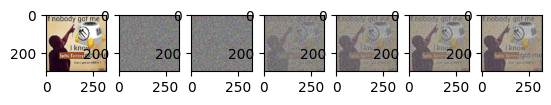

In [3]:
with Image.open("images/image0.jpg") as image:
    im = tf.convert_to_tensor(image, dtype=tf.float32)/255

g1 = tf.random.Generator.from_seed(1)
estimation_start = g1.uniform(shape=im.shape)
estimation = estimation_start

rate = 10
steps = 10000
history = []
for i in range(steps):
    with tf.GradientTape() as g:
        g.watch(estimation)
        y = mean_squared_error(im, estimation)
    gradient = g.gradient(y, estimation)
    estimation = estimation - gradient * rate
    if i % 100 == 0:
        print(f"step: {i}, error {y}", end="\r")
    if i % (steps/5) == 0:
        history.append(estimation)


fig, ax = plt.subplots(1, 2 + len(history))
ax[0].imshow(im)
ax[1].imshow(estimation_start)
for i, step in enumerate(history):
    ax[i+2].imshow(step)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-6.851579e-06..6.843523e-06].


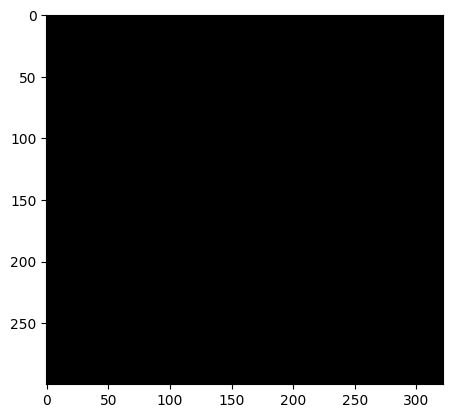

In [6]:
with tf.GradientTape() as g:
    g.watch(estimation)

    error = mean_squared_error(im, estimation)
gradient = g.gradient(error, estimation)
plt.imshow(gradient)

In [ ]:
with Image.open("images/image0.jpg") as image:
    im = tf.convert_to_tensor(image, dtype=tf.float32)
im.dtype

tf.float32

In [20]:
np.float32==tf.float32

True